This NetworkX tutorial will show you how to do graph optimization in Python by solving the Chinese Postman Problem in Python.

https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial

You've probably heard of the Travelling Salesman Problem which amounts to finding the shortest route (say, roads) that connects a set of nodes (say, cities). Although lesser known, the Chinese Postman Problem (CPP), also referred to as the Route Inspection or Arc Routing problem, is quite similar. The objective of the CPP is to find the shortest path that covers all the links (roads) on a graph at least once. If this is possible without doubling back on the same road twice, great; That's the ideal scenario and the problem is quite simple. However, if some roads must be traversed more than once, you need some math to find the shortest route that hits every road at least once with the lowest total mileage.

Edge List

The edge list is a simple data structure that you'll use to create the graph. Each row represents a single edge of the graph with some edge attributes.
node1 & node2: names of the nodes connected.
trail: edge attribute indicating the abbreviated name of the trail for each edge. For example: rs = red square
distance: edge attribute indicating trail length in miles.
color: trail color used for plotting.
estimate: edge attribute indicating whether the edge distance is estimated from eyeballing the trailmap (1=yes, 0=no) as some distances are not provided. This is solely for reference; it is not used for analysis.

In [1]:
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Grab edge list data hosted on Gist
edgelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')

In [4]:
edgelist = pd.read_csv('edgelist_sleeping_giant.csv')

In [6]:
# Preview edgelist
edgelist.head(20)

,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,0.30,red,0
1,v_rs,b_rs,rs,0.21,red,0
2,b_rs,g_rs,rs,0.11,red,0
3,g_rs,w_rs,rs,0.18,red,0
4,w_rs,o_rs,rs,0.21,red,0
5,o_rs,y_rs,rs,0.12,red,0
6,y_rs,rs_end_south,rs,0.39,red,0
7,rc_end_north,v_rc,rc,0.70,red,0
8,v_rc,b_rc,rc,0.04,red,0
9,b_rc,g_rc,rc,0.15,red,0


In [2]:
# Grab node list data hosted on Gist
nodelist = pd.read_csv('nodelist_sleeping_giant.csv')

In [3]:
nodelist.head()

,id,X,Y
0,b_bv,1486,732
1,b_bw,716,1357
2,b_end_east,3164,1111
3,b_end_west,141,1938
4,b_g,1725,771


In [4]:
nodelist.shape

(77, 3)

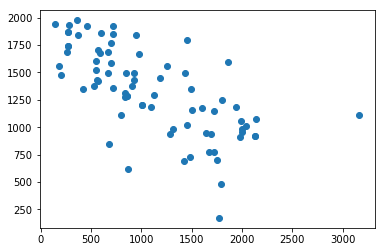

In [8]:
plt.scatter(nodelist.X, nodelist.Y)
plt.show()

In [9]:
import networkx as nx

G=nx.MultiDiGraph()

G.add_edge('John', 'Ana', weight= 3, relation = 'siblings')
G.add_edge('Ana', 'David', weight= 4, relation = 'cousins')
G.add_edge('Ana', 'Bob', weight= 1, relation = 'friends')
G.add_edge('Ana', 'Bob', weight= 1, relation = 'neighbors')

print( G.edge['Bob']['Ana'][1]['relation'] )

KeyError: 'Ana'

In [12]:
import networkx as nx
from networkx.algorithms import bipartite

B = nx.Graph()
B.add_edges_from([('A', 'G'),('A','I'), ('B','H'), ('C', 'G'), ('C', 'I'),('D', 'H'), ('E', 'I'), ('F', 'G'), ('F', 'J')])
X1 = set(['A', 'B', 'C', 'D', 'E', 'F'])

In [13]:
P=bipartite.weighted_projected_graph(B, X1)

In [ ]:
['A']['C']['weight']

In [14]:
P.edges(data=True)

[('C', 'E', {'weight': 1}),
 ('C', 'F', {'weight': 1}),
 ('C', 'A', {'weight': 2}),
 ('A', 'E', {'weight': 1}),
 ('A', 'F', {'weight': 1}),
 ('D', 'B', {'weight': 1})]